In [1]:
import requests
from bs4 import BeautifulSoup
import re
import json

In [2]:
def get_html_page(volume, issue):
    try: 
        kv = {'user-agent': 'Mozilla/5.0'}
        url = "https://academic.oup.com/rfs/issue/{:}/{:}".format(volume, issue)
        print("trying volume {} issue {}".format(volume, issue))

        r = requests.get(url, headers=kv, timeout=30)
        r.raise_for_status()
        r.encoding = r.apparent_encoding
        return r

    except:
        return


In [3]:
def get_article_link(soup):
    article_links = []

    for link in soup.findAll('a'):
        try: 
            href = link.get('href')
            # print(href)
            search = re.search(r'/rfs/article/\d{1,2}/\d{1,2}/\d{1,4}/\d{7}', href)
            if search:
                # print("\n found article link")
                # print(search.group(0))
                # print('\n')
                article_links.append(search.group(0))
        except:
            pass


    article_links = list(set(article_links))
    return article_links



In [4]:
def get_free_article_id(soup):
    # free articles
    free_article_id = []
    script = soup.find('div', 'widget widget-ArticleListAccess widget-instance-OUP_ArticleListAccess').find('script').contents[0]
    free_articles = re.findall('{"id":\d{7},"icon":"icon-availability_free","title":"Free"}', script)
    # print(free_articles)
    for free_article in free_articles:
        parsed = json.loads(free_article)
        id = parsed['id']
        free_article_id.append(id)
    
    # open access articles
    open_access_article_id = []
    script = soup.find('div', 'widget widget-ArticleListAccess widget-instance-OUP_ArticleListAccess').find('script').contents[0]
    open_access_articles = re.findall('{"id":\d{7},"icon":"icon-availability_open","title":"Open Access"}', script)
    # print(open_access_articles)
    for open_access_article in open_access_articles:
        parsed = json.loads(open_access_article)
        id = parsed['id']
        open_access_article_id.append(id)

    return free_article_id + open_access_article_id


In [5]:
def get_free_article_links(article_links, free_article_id):
    if not free_article_id:
        return []

    free_article_links = []
    for link in article_links:
        if int(link.split('/')[-1]) in free_article_id:
            # print(link)
            free_article_links.append(link)
    
    return free_article_links

In [6]:
def get_links(volume = 1, issue = 1):
    response = get_html_page(volume, issue)
    if not response:
        print("invalid url")
        return
    soup = BeautifulSoup(response.text, 'html.parser')
    article_links = get_article_link(soup)
    free_article_id = get_free_article_id(soup)
    # print(free_article_id)
    free_article_links = get_free_article_links(article_links, free_article_id)
    print("completed, {} free articles found".format(len(free_article_links)))
    
    return free_article_links

In [7]:
get_links(volume = 32, issue = 2)

trying volume 32 issue 2
completed, 4 free articles found


['/rfs/article/32/2/524/5061166',
 '/rfs/article/32/2/496/5071904',
 '/rfs/article/32/2/564/5055535',
 '/rfs/article/32/2/423/5042299']

In [8]:
# get all free article links
volumes = [i+1 for i in range(34)]
# volumes = [34]
issues = [i+1 for i in range(20)]

results = []

for vol in volumes:
    for issue in issues:
        res = get_links(vol, issue)
        if not res:
            pass
        try:    
            results = results + res
        except TypeError:
            break




trying volume 1 issue 1
completed, 0 free articles found
trying volume 1 issue 2
completed, 0 free articles found
trying volume 1 issue 3
completed, 0 free articles found
trying volume 1 issue 4
completed, 0 free articles found
trying volume 1 issue 5
invalid url
trying volume 2 issue 1
completed, 0 free articles found
trying volume 2 issue 2
completed, 0 free articles found
trying volume 2 issue 3
completed, 0 free articles found
trying volume 2 issue 4
completed, 0 free articles found
trying volume 2 issue 5
invalid url
trying volume 3 issue 1
completed, 0 free articles found
trying volume 3 issue 2
completed, 0 free articles found
trying volume 3 issue 3
completed, 0 free articles found
trying volume 3 issue 4
completed, 0 free articles found
trying volume 3 issue 5
invalid url
trying volume 4 issue 1
completed, 0 free articles found
trying volume 4 issue 2
completed, 0 free articles found
trying volume 4 issue 3
completed, 0 free articles found
trying volume 4 issue 4
completed, 0 

In [9]:
results

['/rfs/article/22/3/925/1578888',
 '/rfs/article/23/4/1503/1592566',
 '/rfs/article/24/8/2864/1574102',
 '/rfs/article/24/9/3187/1571750',
 '/rfs/article/24/11/3688/1589538',
 '/rfs/article/27/9/2539/1614366',
 '/rfs/article/27/10/2841/1607080',
 '/rfs/article/27/11/3099/1597777',
 '/rfs/article/27/12/3699/1575316',
 '/rfs/article/27/12/3389/1575014',
 '/rfs/article/28/1/1/1682440',
 '/rfs/article/28/2/297/1600102',
 '/rfs/article/28/3/637/1577216',
 '/rfs/article/28/3/650/1574802',
 '/rfs/article/28/3/937/1577317',
 '/rfs/article/28/4/978/1927408',
 '/rfs/article/28/5/1285/1867225',
 '/rfs/article/28/6/1555/1609605',
 '/rfs/article/28/7/1849/1592478',
 '/rfs/article/28/8/2167/1599500',
 '/rfs/article/28/9/2463/1580530',
 '/rfs/article/28/10/2723/1581066',
 '/rfs/article/28/11/2993/1636851',
 '/rfs/article/28/12/3225/1573572',
 '/rfs/article/29/1/5/1843824',
 '/rfs/article/29/2/384/1903200',
 '/rfs/article/29/3/523/1887688',
 '/rfs/article/29/4/863/1896505',
 '/rfs/article/29/5/1113/19

In [10]:
len(results)

156

## Analysis

In [27]:
import pandas as pd

In [28]:
articles = pd.DataFrame({'url': results})
articles.head()

,url
0,/rfs/article/22/3/925/1578888
1,/rfs/article/23/4/1503/1592566
2,/rfs/article/24/8/2864/1574102
3,/rfs/article/24/9/3187/1571750
4,/rfs/article/24/11/3688/1589538


In [31]:
articles.to_csv('rfs_free_article_url.csv', index=False)

In [32]:
articles['volume'] = articles['url'].apply(lambda x: x.split('/')[-4])

In [33]:
articles.head()

,url,volume
0,/rfs/article/22/3/925/1578888,22
1,/rfs/article/23/4/1503/1592566,23
2,/rfs/article/24/8/2864/1574102,24
3,/rfs/article/24/9/3187/1571750,24
4,/rfs/article/24/11/3688/1589538,24


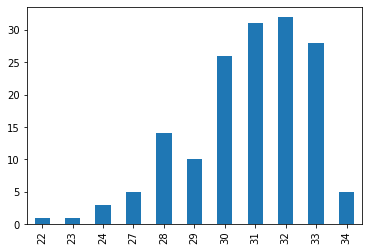

In [35]:
articles['volume'].value_counts().sort_index().plot(kind='bar')

Text(0, 0.5, 'free article count')

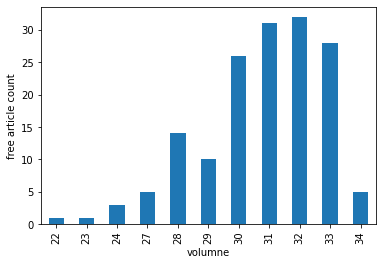

In [38]:
ax = articles['volume'].value_counts().sort_index().plot(kind='bar')
ax.set_xlabel('volumne')
ax.set_ylabel('free article count')